In [1]:
!pip install pysqlite3
!pip install sqlalchemy

  Using cached pysqlite3-0.4.5.tar.gz (40 kB)
  Running setup.py clean for pysqlite3
Failed to build pysqlite3
    Running setup.py install for pysqlite3: started
    Running setup.py install for pysqlite3: finished with status 'done'


  Command arguments: 'C:\Users\Marco Gamez\Miniconda3\envs\actumlogos-cpu\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\MARCOG~1\\AppData\\Local\\Temp\\pip-install-8cwexkc4\\pysqlite3_89625c53b9cf42749311c7e25c5c81d2\\setup.py'"'"'; __file__='"'"'C:\\Users\\MARCOG~1\\AppData\\Local\\Temp\\pip-install-8cwexkc4\\pysqlite3_89625c53b9cf42749311c7e25c5c81d2\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\MARCOG~1\AppData\Local\Temp\pip-wheel-8hxslphm'
  Command output: [use --verbose to show]


In [2]:
import pandas as pd
import numpy as np
import sqlite3
from sqlalchemy import create_engine

In [3]:
#Set data directory
DIR = 'D:\Health Data Science Program\Módulo 4 Obtención de datos y generación de repositorios\Actividades'
FILE  = '\def17.csv'

file = '{}{}'.format(DIR, FILE)

print('File Directory: {}'.format(file))

File Directory: D:\Health Data Science Program\Módulo 4 Obtención de datos y generación de repositorios\Actividades\def17.csv


In [4]:
#Read the head of the DataSet
print(pd.read_csv(file, nrows=2))

   ENT_REGIS  MUN_REGIS  ENT_RESID  MUN_RESID  TLOC_RESID  LOC_RESID  \
0          1          1          1          1          15          1   
1          1          9          1          9           1         16   

   ENT_OCURR  MUN_OCURR  TLOC_OCURR  LOC_OCUR  ... ANIO_CERT MATERNAS  LENGUA  \
0          1          1          15         1  ...      2017      NaN       9   
1          1          9           1        16  ...      2017      NaN       9   

   COND_ACT  PAR_AGRE  ENT_OCULES  MUN_OCULES  LOC_OCULES  RAZON_M  DIS_RE_OAX  
0         2        88          88         888        8888      NaN         999  
1         2        88          88         888        8888      NaN         999  

[2 rows x 59 columns]


## Carga de datos de manera más rápida utilizando SQL

In [5]:
#Create a connector to a database
csv_database = create_engine('sqlite:///excel_database.db')

In [6]:
#Building the database by chunking
chunksize = 10000
i = 0
j=0

for df in pd.read_csv(file, chunksize = chunksize, iterator=True):
    df = df.rename(columns = {c: c.replace(' ', '') for c in df.columns})
    df.index += j
    
    df.to_sql('data_use', csv_database, if_exists = 'append')
    j = df.index[-1]+1
    
    print('| index: {}'.format(j))


| index: 10000
| index: 30000
| index: 60000
| index: 100000
| index: 150000
| index: 210000
| index: 280000
| index: 360000
| index: 450000
| index: 550000
| index: 660000
| index: 780000
| index: 910000
| index: 1050000
| index: 1200000
| index: 1360000
| index: 1530000
| index: 1710000
| index: 1900000
| index: 2100000
| index: 2310000
| index: 2530000
| index: 2760000
| index: 3000000
| index: 3250000
| index: 3510000
| index: 3780000
| index: 4060000
| index: 4350000
| index: 4650000
| index: 4960000
| index: 5280000
| index: 5610000
| index: 5950000
| index: 6300000
| index: 6660000
| index: 7030000
| index: 7410000
| index: 7800000
| index: 8200000
| index: 8610000
| index: 9030000
| index: 9460000
| index: 9900000
| index: 10350000
| index: 10810000
| index: 11280000
| index: 11760000
| index: 12250000
| index: 12750000
| index: 13260000
| index: 13780000
| index: 14310000
| index: 14850000
| index: 15400000
| index: 15960000
| index: 16530000
| index: 17110000
| index: 1770000

In [7]:
#Construct dataframe for research use from the database
df = pd.read_sql_query('SELECT ENT_REGIS, MUN_REGIS, ENT_RESID, CAUSA_DEF, MES_OCURR FROM data_use', csv_database)

In [8]:
df.head(5)

,ENT_REGIS,MUN_REGIS,ENT_RESID,CAUSA_DEF,MES_OCURR
0,1,1,1,I679,7
1,1,9,1,I64X,11
2,1,1,1,E112,2
3,1,6,1,X590,12
4,1,1,1,I251,3


In [9]:
df.index

RangeIndex(start=0, stop=3515235, step=1)

## Principales Causas de Muerte en México 2017

In [10]:
#Agrupación de valores por tipo de enfermedad y mayor número de decesos 
defunciones = df.groupby(['CAUSA_DEF']).count()
defunciones = defunciones.sort_values('MES_OCURR',ascending = 0)
defunciones

,ENT_REGIS,MUN_REGIS,ENT_RESID,MES_OCURR
CAUSA_DEF,,,,
I219,462775,462775,462775,462775
E119,155385,155385,155385,155385
E112,138100,138100,138100,138100
J189,86010,86010,86010,86010
K746,76935,76935,76935,76935
...,...,...,...,...
W796,5,5,5,5
M485,5,5,5,5
M484,5,5,5,5


In [11]:
#Busqueda de códigos correspondietes a las principales enfermedades
print('Códigos correspondientes a las principales muertes en México en 2017: ')

i = 1
index_defunciones = []

for index in defunciones.index:
    if i < 4:
        print('{}. {}'.format(i, index))
        index_defunciones.append(index)
        i = i+1
    else:
        break;
        
    

Códigos correspondientes a las principales muertes en México en 2017: 
1. I219
2. E119
3. E112


## Limpieza de dataset correspondiente a las enfermedades

In [12]:
#Carga de dataset relacionado al código de las enfermmedades
codigos = pd.read_csv(r"D:\Health Data Science Program\Módulo 4 Obtención de datos y generación de repositorios\Actividades\decatcausa.csv", encoding = 'latin-1', sep = '\n' )

In [13]:
codigos

,"CLAVE\tNOMBRE,,,,,,,"
0,"A000\t""Cólera debido a Vibrio cholerae 01,"" bi..."
1,"A001\t""Cólera debido a Vibrio cholerae 01,"" bi..."
2,"A009\t""Cólera,"" no especificado"""""",,,,,,"
3,"A010\tFiebre tifoidea,,,,,,,"
4,"A011\tFiebre paratifoidea A,,,,,,,"
...,...
10658,"Y919\t""Alcoholismo,"" nivel de intoxicación no ..."
10659,"Y95X\tAfección nosocomial,,,,,,,"
10660,"Y96X\tAfección relacionada con el trabajo,,,,,,,"
10661,Y97X\tAfección relacionada con la contaminació...


In [14]:
codigos.columns

Index(['CLAVE\tNOMBRE,,,,,,,'], dtype='object')

In [15]:
df_codes = codigos['CLAVE\tNOMBRE,,,,,,,']

In [16]:
df_codes

0        A000\t"Cólera debido a Vibrio cholerae 01," bi...
1        A001\t"Cólera debido a Vibrio cholerae 01," bi...
2                 A009\t"Cólera," no especificado""",,,,,,
3                             A010\tFiebre tifoidea,,,,,,,
4                       A011\tFiebre paratifoidea A,,,,,,,
                               ...                        
10658    Y919\t"Alcoholismo," nivel de intoxicación no ...
10659                     Y95X\tAfección nosocomial,,,,,,,
10660     Y96X\tAfección relacionada con el trabajo,,,,,,,
10661    Y97X\tAfección relacionada con la contaminació...
10662    Y98X\tAfección relacionada con el estilo de vi...
Name: CLAVE\tNOMBRE,,,,,,,, Length: 10663, dtype: object

In [17]:
df_codes[1000]

'C491\t"Tumor maligno del tejido conjuntivo y tejido blando del miembro superior," incluido el hombro""",,,,,,'

In [18]:
#División de códigos con respectivo nombre de la enfermedad
lista_claves = []
lista_enfermedad = []
for index in df_codes:
    lista_claves.append(index[0:4])
    lista_enfermedad.append(index[4:])

In [19]:
#Limpieza de nombres relacionados a la enfermedad
lista_enfermedad1 = []
for index in lista_enfermedad:
    index = index.replace(',','')
    index = index.replace('"', '')
    index = index.replace('\t', '')
    lista_enfermedad1.append(index)
    


In [20]:
#DataFrame con las Claves y Enferemdades
df_disease = pd.DataFrame()
df_disease['Clave'] = lista_claves
df_disease['Nombre'] = lista_enfermedad1 

In [21]:
df_disease

,Clave,Nombre
0,A000,Cólera debido a Vibrio cholerae 01 biotipo cho...
1,A001,Cólera debido a Vibrio cholerae 01 biotipo el Tor
2,A009,Cólera no especificado
3,A010,Fiebre tifoidea
4,A011,Fiebre paratifoidea A
...,...,...
10658,Y919,Alcoholismo nivel de intoxicación no especificado
10659,Y95X,Afección nosocomial
10660,Y96X,Afección relacionada con el trabajo
10661,Y97X,Afección relacionada con la contaminación ambi...


In [22]:
#Busqueda de enfermedad utilizando claves previamente obtenidas
print('Causas principales de muerte en México en 2017')

for claves in index_defunciones:
    print(df_disease.loc[df_disease['Clave'] == claves])
    

Causas principales de muerte en México en 2017
     Clave                                             Nombre
3254  I219  Infarto agudo del miocardio sin otra especific...
     Clave                                             Nombre
1784  E119  Diabetes mellitus no insulinodependiente sin m...
     Clave                                             Nombre
1777  E112  Diabetes mellitus no insulinodependiente con c...


C:\Users\Marco Gamez\Miniconda3\envs\actumlogos-cpu\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Marco Gamez\Miniconda3\envs\actumlogos-cpu\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  if sys.path[0] == '':
C:\Users\Marco Gamez\Miniconda3\envs\actumlogos-cpu\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  del sys.path[0]


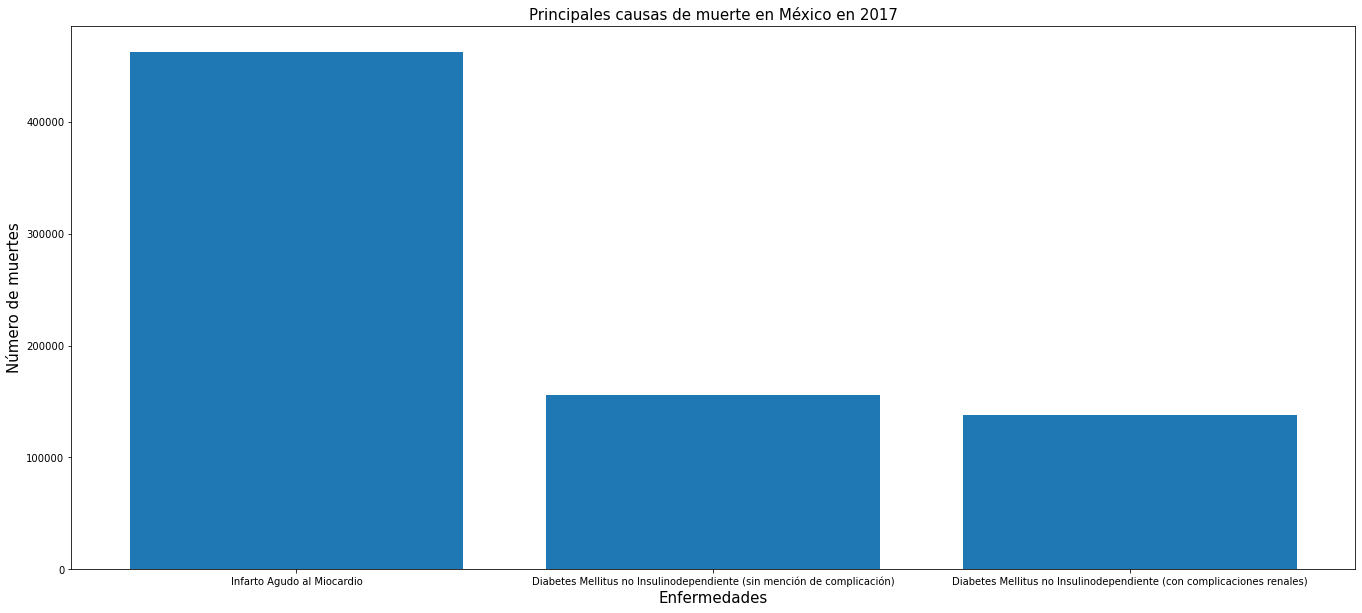

In [23]:
#Visualización de Principales causas de muerte en México 2017
import matplotlib.pyplot as plt
plt.subplots(figsize = (23,10))

primero = defunciones.iloc[0]['MES_OCURR']
segundo = defunciones.iloc[1]['MES_OCURR']
tercero = defunciones.iloc[2]['MES_OCURR']
y = [primero, segundo, tercero]
x = ['Infarto Agudo al Miocardio', 'Diabetes Mellitus no Insulinodependiente (sin mención de complicación)', 'Diabetes Mellitus no Insulinodependiente (con complicaciones renales)']
plt.bar(x,y)
plt.title('Principales causas de muerte en México en 2017', Fontsize = 15)
plt.xlabel('Enfermedades', Fontsize = 15)
plt.ylabel('Número de muertes', Fontsize = 15)
plt.show()


## Estados con mayor incidencia de enfermedades detectadas

In [25]:
#Cantidad de muertes relacionadas a INFARTOS con el código I219
infartos = []
for i in range(1,33):
    infartos.append(((df['CAUSA_DEF']=='I219')&(df['ENT_REGIS']==i)).sum())
infartos

[2865,
 10775,
 2215,
 2950,
 11280,
 3140,
 14595,
 14845,
 54470,
 8635,
 25395,
 11715,
 11735,
 28120,
 49520,
 16405,
 7740,
 4990,
 21565,
 13160,
 24085,
 7170,
 2895,
 9955,
 11500,
 12895,
 7915,
 14410,
 3200,
 37265,
 10250,
 5120]

In [134]:
#Detección del índice del estado con mayor infartos en el país y número de muertos
mayor_infartos = np.argmax(infartos)
print('Indice Mayor (Referente al Estado): ',mayor_infartos)
print('Número de Muertos por infartos: ',infartos[mayor_infartos])


Indice Mayor (Referente al Estado):  8
Número de Muertos por infartos:  43576


In [42]:
#Cantidad de muertes relacionadas a DIABETES MELLITUS con el código E119
diabetes_sc = []
for i in range(1,33):
    diabetes_sc.append(((df['CAUSA_DEF']=='E119')&(df['ENT_REGIS']==i)).sum())

In [135]:
#Detección del índice del estado con mayor diabetes sin complicaiones en el país y número de muertos
mayor_diabetessc = np.argmax(diabetes_sc)
print('Indice Mayor (Referente al Estado): ', mayor_diabetessc)
print('Número de Muertos por infartos: ', diabetes_sc[mayor_diabetessc])

Indice Mayor (Referente al Estado):  8
Número de Muertos por infartos:  14692


In [45]:
#Cantidad de muertes relacionadas a DIABETES MELITUS con el código E112
diabetes_cc = []
for i in range(1,33):
    diabetes_cc.append(((df['CAUSA_DEF']=='E112')&(df['ENT_REGIS']==i)).sum())

In [136]:
#Detección del índice del estado con mayor diabetes con complicaiones en el país y número de muertos
mayor_diabetescc = np.argmax(diabetes_cc)
print('Indice Mayor (Refente al Estado): ', mayor_diabetescc)
print('Número de Muertos por infartos: ', diabetes_cc[mayor_diabetescc])

Indice Mayor (Refente al Estado):  14
Número de Muertos por infartos:  16284


In [65]:
#Carga de base de datos relacionada a los Estados de la República
df_estados = pd.read_csv(r"D:\Health Data Science Program\Módulo 4 Obtención de datos y generación de repositorios\Actividades\decateml.csv", encoding = 'latin-1', sep = '\n')

In [66]:
df_estados

,"CVE_ENT,CVE_MUN,CVE_LOC,NOM_LOC"
0,"1,0,0,Aguascalientes"
1,"1,1,0,Aguascalientes"
2,"1,1,1,Aguascalientes"
3,"1,1,106,Arellano"
4,"1,1,127,Los Caños"
...,...
28921,"88,888,0,Municipio no aplica para A00 - R99 Y ..."
28922,"88,888,8888,Localidad no no aplica para A00 - ..."
28923,"99,0,0,Entidad no especficada"
28924,"99,999,0,Municipio no especificados"


In [67]:
df_estados.columns

Index(['CVE_ENT,CVE_MUN,CVE_LOC,NOM_LOC'], dtype='object')

In [68]:
estados = df_estados['CVE_ENT,CVE_MUN,CVE_LOC,NOM_LOC']
estados

0                                     1,0,0,Aguascalientes
1                                     1,1,0,Aguascalientes
2                                     1,1,1,Aguascalientes
3                                         1,1,106,Arellano
4                                        1,1,127,Los Caños
                               ...                        
28921    88,888,0,Municipio no aplica para A00 - R99 Y ...
28922    88,888,8888,Localidad no no aplica para A00 - ...
28923                        99,0,0,Entidad no especficada
28924                  99,999,0,Municipio no especificados
28925                99,999,9999,Localidad no especificada
Name: CVE_ENT,CVE_MUN,CVE_LOC,NOM_LOC, Length: 28926, dtype: object

In [131]:
#Obtención de Estados de la República Mexicana (LIMPIEZA)

estados_procesed = []
i = 0

for i in range(1,33):
    i_str = str(i)
    for mex in estados:
        est = mex.split(',')
        if (est[0:3] == [i_str, '0', '0']):
            estados_procesed.append(est[3:])
        else:
            pass



In [152]:
estados_procesed

[['Aguascalientes'],
 ['Baja California'],
 ['Baja California Sur'],
 ['Campeche'],
 ['Coahuila de Zaragoza'],
 ['Colima'],
 ['Chiapas'],
 ['Chihuahua'],
 ['Ciudad de México'],
 ['Durango'],
 ['Guanajuato'],
 ['Guerrero'],
 ['Hidalgo'],
 ['Jalisco'],
 ['México'],
 ['Michoacán de Ocampo'],
 ['Morelos'],
 ['Nayarit'],
 ['Nuevo León'],
 ['Oaxaca'],
 ['Puebla'],
 ['Querétaro'],
 ['Quintana Roo'],
 ['San Luis Potosí'],
 ['Sinaloa'],
 ['Sonora'],
 ['Tabasco'],
 ['Tamaulipas'],
 ['Tlaxcala'],
 ['Veracruz de Ignacio de la Llave'],
 ['Yucatán'],
 ['Zacatecas']]

In [194]:
estados_mex = pd.DataFrame()
estados_mex['Estados'] = estados_procesed

In [195]:
estados_mex

,Estados
0,[Aguascalientes]
1,[Baja California]
2,[Baja California Sur]
3,[Campeche]
4,[Coahuila de Zaragoza]
5,[Colima]
6,[Chiapas]
7,[Chihuahua]
8,[Ciudad de México]
9,[Durango]


In [165]:
#Valores refentes a los estados con más muertes dependiendo de la enfermedad
indices_estados = [mayor_infartos, mayor_diabetessc, mayor_diabetescc]
muertes = [infartos[mayor_infartos], diabetes_sc[mayor_diabetessc], diabetes_cc[mayor_diabetescc]]


In [164]:
#Impresión de Estados con mayor índice de mortalidad dependiendo de la enfermedad detectada
print('Estados con mayor indice de mortalidad, considerando las enfermedades detectadas:')
print('1. Infartos al miocardio: {} / {} muertes en 2017'.format(estados_mex.Estados.values[indices_estados[0]], muertes[0]))
print('2. Diabetes Mellitus sin complicaciones: {} / {} muertes en 2017'.format(estados_mex.Estados.values[indices_estados[1]], muertes[1]))
print('3. Diabetes Mellitus con complicaciones renales: {} / {} muertes en 2017'.format(estados_mex.Estados.values[indices_estados[2]], muertes[2]))

Estados con mayor indice de mortalidad, considerando las enfermedades detectadas:
1. Infartos al miocardio: ['Ciudad de México'] / 43576 muertes en 2017
2. Diabetes Mellitus sin complicaciones: ['Ciudad de México'] / 14692 muertes en 2017
3. Diabetes Mellitus con complicaciones renales: ['México'] / 16284 muertes en 2017
